#### Develop a Deep Learning Model to Describe Photographs using Keras (Automated Image Captioning)

- Caption generation is a challenging artificial intelligence problem where a textual description must be generated for a given photograph.

- It requires both methods from computer vision to understand the content of the image and a language model from the field of natural language processing to turn the understanding of the image into words in the right order. 

- Deep learning methods have demonstrated state-of-the-art results on caption generation problems. What is most impressive about these methods is a single end-to-end model can be defined to predict a caption, given a photo, instead of requiring sophisticated data preparation or a pipeline of specifically designed models.

#### In the below code, we are able to understand
- How to prepare photo and text data for training a deep learning model.
- How to design and train a deep learning caption generation model.
- How to evaluate a train caption generation model and use it to caption entirely new photographs.

#### The below code brodly classified into

- Photo and Caption Dataset
- Prepare Photo Data
- Prepare Text Data
- Develop Deep Learning Model
- Evaluate Model
- Generate New Captions

#### Data Set
Photo and Caption Dataset
A good dataset to use when getting started with image captioning is the Flickr8K dataset.

The reason is because it is realistic and relatively small so that you can download it and build models on your workstation using a CPU.

The dataset is available for free. You must complete a request form and the links to the dataset will be emailed to you. I would love to link to them for you, but the email address expressly requests: “Please do not redistribute the dataset“.

You can use the link below to request the dataset:

Flickr8k_Dataset.zip (1 Gigabyte) An archive of all photographs.

Link: https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip

Flickr8k_text.zip (2.2 Megabytes) An archive of all text descriptions for photographs.

Link: https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip

Download the datasets and unzip them into your current working directory. You will have two directories:

- Flickr8k_Dataset: Contains 8092 photographs in JPEG format.
- Flickr8k_text: Contains a number of files containing different sources of descriptions for the photographs.

The dataset has a pre-defined training dataset (6,000 images), development dataset (1,000 images), and test dataset (1,000 images).

### Prepare Photo Data

In this example, We will use a pre-trained model to interpret the content of the photos.

There are many models to choose from. In this case, we will use the Oxford Visual Geometry Group, or VGG, model that won the ImageNet competition in 2014. 

Keras provides this pre-trained model directly. Note, the first time you use this model, Keras will download the model weights from the Internet, which are about 500 Megabytes. This may take a few minutes depending on your internet connection.

We could use this model as part of a broader image caption model. The problem is, it is a large model and running each photo through the network every time we want to test a new language model configuration (downstream) is redundant.

Instead, we can pre-compute the “photo features” using the pre-trained model and save them to file. We can then load these features later and feed them into our model as the interpretation of a given photo in the dataset. It is no different to running the photo through the full VGG model; it is just we will have done it once in advance.

This is an optimization that will make training our models faster and consume less memory.

We can load the VGG model in Keras using the VGG class. We will remove the last layer from the loaded model, as this is the model used to predict a classification for a photo. We are not interested in classifying images, but we are interested in the internal representation of the photo right before a classification is made. These are the “features” that the model has extracted from the photo.

Keras also provides tools for reshaping the loaded photo into the preferred size for the model (e.g. 3 channel 224 x 224 pixel image).

Below is a function named extract_features() that, given a directory name, will load each photo, prepare it for VGG, and collect the predicted features from the VGG model. The image features are a 1-dimensional 4,096 element vector.

The function returns a dictionary of image identifier to image features.

In [4]:
from os import listdir
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

#We can call this function to prepare the photo data for testing our models, 
#then save the resulting dictionary to a file named ‘features.pkl‘.

# extract features from each photo in the directory
def extract_features(directory):
	# load the model
	model = VGG16()
	# re-structure the model
	model.layers.pop()
	model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
	# summarize
	print(model.summary())
	# extract features from each photo
	features = dict()
	for name in listdir(directory):
		# load an image from file
		filename = directory + '/' + name
		image = load_img(filename, target_size=(224, 224))
		# convert the image pixels to a numpy array
		image = img_to_array(image)
		# reshape data for the model
		image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
		# prepare the image for the VGG model
		image = preprocess_input(image)
		# get features
		feature = model.predict(image, verbose=0)
		# get image id
		image_id = name.split('.')[0]
		# store feature
		features[image_id] = feature
		print('>%s' % name)
	return features

# extract features from all images
directory = './Flickr8k_Dataset'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('features.pkl', 'wb'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

>1229756013_94663527d7.jpg
>1231229740_8dcbf80bfb.jpg
>1232148178_4f45cc3284.jpg
>1234293791_6566284bcd.jpg
>1234817607_924893f6e1.jpg
>1235580648_7eebaed9bc.jpg
>1235681222_819231767a.jpg
>1235685934_be89b231fb.jpg
>1236951314_0308dc4138.jpg
>1236964638_1808784a3c.jpg
>1237985362_dbafc59280.jpg
>123889082_d3751e0350.jpg
>123997871_6a9ca987b1.jpg
>1240297429_c36ae0c58f.jpg
>124195430_d14028660f.jpg
>1244140539_da4804d828.jpg
>1244306891_8e78ae1620.jpg
>1244485675_822e6efe60.jpg
>1245022983_fb329886dd.jpg
>1247181182_35cabd76f3.jpg
>1248357227_2b4175fc39.jpg
>1248734482_3038218f3b.jpg
>124881487_36e668145d.jpg
>1248940539_46d33ed487.jpg
>1248953128_24c9f8d924.jpg
>124972799_de706b6d0b.jpg
>1251558317_4ef844b775.jpg
>1252396628_eb81d3905b.jpg
>1252787177_4b08625897.jpg
>125319704_49ead3463c.jpg
>1253264731_e7c689eca5.jpg
>1253275679_e955fb7304.jpg
>1255504166_f2437febcb.jpg
>1258913059_07c613f7ff.jpg
>1259936608_e3f0064f23.jpg
>1260816604_570fc35836.jpg
>1262077938_8b9516c273.jpg
>126245

>1460500597_866fa0c6f3.jpg
>146098876_0d99d7fb98.jpg
>146100443_906d87faa2.jpg
>1461329041_c623b06e5b.jpg
>1461653394_8ab96aae63.jpg
>1461667284_041c8a2475.jpg
>1463638541_c02cfa04dc.jpg
>1463732130_a754441289.jpg
>1463732807_0cdf4f22c7.jpg
>1464120327_d90279ca3a.jpg
>1465666502_de289b3b9c.jpg
>146577645_91b570c0d0.jpg
>146577646_9e64b8c2dc.jpg
>1466307485_5e6743332e.jpg
>1466307489_cb8a74de09.jpg
>1466479163_439db855af.jpg
>1467533293_a2656cc000.jpg
>1468103286_96a6e07029.jpg
>1468389504_c724bdcad0.jpg
>1468429623_f001988691.jpg
>1468962616_5803b4397f.jpg
>1469000260_5d473c8283.jpg
>1469358746_2a879abaf3.jpg
>1470061031_4cb59c12a8.jpg
>1470132731_fa416b7504.jpg
>1470536919_1f3fd6c65a.jpg
>1472053993_bed67a3ba7.jpg
>1472230829_803818a383.jpg
>1472249944_d887c3aeda.jpg
>1472653060_7427d2865a.jpg
>1472882567_33dc14c8b6.jpg
>1473080948_bae2925dc8.jpg
>1473250020_dc829a090f.jpg
>1473618073_7db56a5237.jpg
>1474474514_b3eb492722.jpg
>1475046848_831245fc64.jpg
>1476002408_4256b7b2fa.jpg
>1476

>1937104503_313d22a2d0.jpg
>1937262236_cbf5bfa101.jpg
>1947351225_288d788983.jpg
>195084264_72fb347b0f.jpg
>1952896009_cee8147c90.jpg
>1956678973_223cb1b847.jpg
>1956944011_c5661d3f22.jpg
>1957371533_62bc720bac.jpg
>195962284_e57178054a.jpg
>195962790_3380aea352.jpg
>1962729184_6996e128e7.jpg
>1965278563_8279e408de.jpg
>1969573381_5ecfae4c80.jpg
>197107117_4b438b1872.jpg
>197142902_f05ff198c2.jpg
>197504190_fd1fc3d4b7.jpg
>1975171469_84e425f61b.jpg
>1975531316_8b00eeaaf7.jpg
>1977827746_4e13d7e19f.jpg
>197924859_f6e39a7dfa.jpg
>1980315248_82dbc34676.jpg
>1980882959_9a161f3469.jpg
>1982852140_56425fa7a2.jpg
>1984936420_3f3102132b.jpg
>1989145280_3b54452188.jpg
>1991806812_065f747689.jpg
>1994416869_4dd769a806.jpg
>199463720_329a802206.jpg
>199809190_e3f6bbe2bc.jpg
>1998255400_0cd086908f.jpg
>1998457059_c9ac9a1e1a.jpg
>1999444757_1b92efb590.jpg
>2000459828_3c9e109106.jpg
>2003663004_5b70920a98.jpg
>2004674713_2883e63c67.jpg
>200771289_31902164a7.jpg
>2009636597_e3f4fe19fb.jpg
>201682811_

>2156131463_5b53636cf0.jpg
>2156726763_034ecd2e39.jpg
>2157003092_eaeb977789.jpg
>2157173498_2eea42ee38.jpg
>2158247955_484f0a1f11.jpg
>2158267555_db1d94e468.jpg
>215876547_fa584c5ec3.jpg
>2159447283_fab8c272b0.jpg
>2160266952_a2ab39191b.jpg
>216172386_9ac5356dae.jpg
>2161799386_27aa938421.jpg
>2162469360_ff777edc95.jpg
>2162564553_96de62c7e6.jpg
>2164363131_6930455d45.jpg
>2165459064_5b81ff23eb.jpg
>2165461920_1a4144eb2b.jpg
>2165677531_e1d5e086f7.jpg
>2167644298_100ca79f54.jpg
>2169067981_cc19268f23.jpg
>2169951750_495820a215.jpg
>2170187328_65c2f11891.jpg
>2170222061_e8bce4a32d.jpg
>2171154778_8189169336.jpg
>2171576939_d1e72daab2.jpg
>2171891283_dedd9cf416.jpg
>2172493537_128bc8b187.jpg
>2172526745_649f420569.jpg
>2173061319_1f267765dc.jpg
>2173312932_269f9786fc.jpg
>2173677067_9d0732bcc2.jpg
>2174206711_11cb712a8d.jpg
>217583047_5e93e1e119.jpg
>2176147758_9a8deba576.jpg
>2176364472_31fcd37531.jpg
>2176874361_2b4149010b.jpg
>2176980976_7054c99621.jpg
>2178064851_bb39652d28.jpg
>217

>2276120079_4f235470bc.jpg
>2276314067_7ee246f859.jpg
>2276499757_b44dc6f8ce.jpg
>2277081067_d2b4c98bce.jpg
>2277299634_e14bdb7ff7.jpg
>2278110011_ba846e7795.jpg
>2278766574_f71f1704a8.jpg
>2278776373_fe499a93be.jpg
>2279496715_8ef3ee6edb.jpg
>2279945145_8815c59217.jpg
>2279980395_989d48ae72.jpg
>2280354512_c0d035d53f.jpg
>2280525192_81911f2b00.jpg
>2281006675_fde04e93dd.jpg
>2281054343_95d6d3b882.jpg
>2281075738_230892b241.jpg
>2281768510_9cc5728c55.jpg
>2282043629_91b7831352.jpg
>2282260240_55387258de.jpg
>2282522980_45cfa8e0cf.jpg
>2282600972_c22d1e03c7.jpg
>2282895743_f803f1cf01.jpg
>2283966256_70317e1759.jpg
>2284239186_c827f4defa.jpg
>2284894733_b710b9b106.jpg
>2285152690_3fb93f65f1.jpg
>2285570521_05015cbf4b.jpg
>2285741931_07159a21f2.jpg
>2286032269_8ba929709c.jpg
>2286235203_af3cd8f243.jpg
>2286236765_2a63eeb550.jpg
>2286239223_d84ffc4e4a.jpg
>2286270205_16038dec5a.jpg
>2286823363_7d554ea740.jpg
>2287023569_fd7a9c60b8.jpg
>2287887341_663bfa15af.jpg
>2288099178_41091aa00c.jpg
>

>2394857899_76bfdf720b.jpg
>2394919002_ed7527ff93.jpg
>2394922193_310166d6af.jpg
>2395967330_7e6ea404f6.jpg
>2396025708_e4a72e2558.jpg
>2396100671_3a9d67f03d.jpg
>2396669903_5217a83641.jpg
>2396691909_6b8c2f7c44.jpg
>2396746868_0727e06983.jpg
>239807547_4923efc821.jpg
>2398605966_1d0c9e6a20.jpg
>2399114095_c3196ff456.jpg
>2399219552_bbba0a9a59.jpg
>2399551242_c62a46dd5f.jpg
>2400958566_4e09424046.jpg
>2402462857_7684848704.jpg
>2402744031_11f9f2f2b8.jpg
>2402793046_3385554e81.jpg
>2403078014_4b1d6f8bde.jpg
>2403376030_903521c371.jpg
>2403544744_cba152f5c1.jpg
>2404488732_ca1bbdacc2.jpg
>2404520067_87798dbaee.jpg
>2404692474_37da774368.jpg
>2405599120_ec5f32af6f.jpg
>240583223_e26e17ee96.jpg
>2405978603_6221b0c2e7.jpg
>2406591500_403f145905.jpg
>240696675_7d05193aa0.jpg
>2407091303_931c918490.jpg
>2407470303_6fd5e3600d.jpg
>2409312675_7755a7b816.jpg
>2409597310_958f5d8aff.jpg
>2410040397_1a161a1146.jpg
>2410153942_ba4a136358.jpg
>241031254_0c6f30e3d1.jpg
>241031670_e60f59b8e4.jpg
>24103

>2474092890_6c0781a8ed.jpg
>2474918824_88660c7757.jpg
>2475162978_2c51048dca.jpg
>2475300106_b8563111ba.jpg
>247617035_9f2e821534.jpg
>247617754_4b1137de8c.jpg
>247618600_239eeac405.jpg
>247619370_a01fb21dd3.jpg
>2476214153_99a3998509.jpg
>247637795_fdf26a03cf.jpg
>247652942_29ede19352.jpg
>247691240_3881777ab8.jpg
>247704641_d883902277.jpg
>247706586_7e25c7adf8.jpg
>2477121456_1ac5c6d3e4.jpg
>2477623312_58e8e8c8af.jpg
>247778426_fd59734130.jpg
>2478929971_9eb6c074b6.jpg
>2479162876_a5ce3306af.jpg
>2479180530_7ebba2d8bf.jpg
>2479553749_f7ac031940.jpg
>2479652566_8f9fac8af5.jpg
>2480021389_dda9fb2818.jpg
>2480327661_fb69829f57.jpg
>2480664591_e6d22ed61c.jpg
>2480668859_6f9b46be6a.jpg
>2480820830_bdec1f5b76.jpg
>2480832276_fa55480ecb.jpg
>2480850054_de3433b54a.jpg
>2481003841_06086eafc2.jpg
>2481367956_8577d2fa98.jpg
>2481490320_7978c76271.jpg
>2481598514_05a65d1f72.jpg
>248174959_2522871152.jpg
>2482629385_f370b290d1.jpg
>2483792149_a9b4ffecec.jpg
>2483993772_f64e9e4724.jpg
>2483993827_

>2579266054_1ec58aa92f.jpg
>2579268572_d78f8436cb.jpg
>2579460386_94c489028d.jpg
>2579572274_826598b14a.jpg
>2579899436_5086a33c7a.jpg
>2580215443_4e64afe3d5.jpg
>2581066814_179d28f306.jpg
>2582390123_71120edb0c.jpg
>2583001715_1ce6f58942.jpg
>2584020755_14e2b3e8fc.jpg
>2584412512_6767593f24.jpg
>2584487952_f70e5aa9bf.jpg
>258476074_f28f4a1ae6.jpg
>2584957647_4f9235c150.jpg
>2585141045_b496a7b7c4.jpg
>2586028627_ddd054d8cc.jpg
>2586532797_dcf22a5021.jpg
>2586911841_41b7a48c91.jpg
>2587017287_888c811b5a.jpg
>2587106431_1cc0e719c6.jpg
>2587696611_db0378710f.jpg
>2587818583_4aa8e7b174.jpg
>2587846523_b177c9a3e3.jpg
>2588456052_8842b47005.jpg
>2588625139_fdf6610218.jpg
>2588927489_f4da2f11ec.jpg
>2589156742_c46bc82137.jpg
>2589241160_3832440850.jpg
>2589308405_e208b5e745.jpg
>2590207488_ddd89037ba.jpg
>2591110592_ef5f54f91c.jpg
>2591455200_2319651f2f.jpg
>2591486448_48d5438343.jpg
>2591603141_33d6397e0a.jpg
>2592019072_a6c0090da4.jpg
>2592711202_55f8c64495.jpg
>259314892_a42b8af664.jpg
>25

>2680619645_ab6645218d.jpg
>2680990587_eee6bd04fb.jpg
>2681215810_00b0642f7b.jpg
>2682194299_92005b26c6.jpg
>2682382530_f9f8fd1e89.jpg
>268365231_a0acecdc45.jpg
>2683963310_20dcd5e566.jpg
>2683985894_167d267dcb.jpg
>2684322797_85406f571d.jpg
>2684323357_c7a6d05d05.jpg
>2684489465_32ba1d0344.jpg
>2685139184_4ff45e0f76.jpg
>2685752892_9d5cd7f274.jpg
>2685788323_ceab14534a.jpg
>2686432878_0697dbc048.jpg
>268654674_d29e00b3d0.jpg
>268704620_8a8cef4cb3.jpg
>2687229880_97cfd8148e.jpg
>2687328779_b4356dab16.jpg
>2687529141_edee32649e.jpg
>2687539673_d54a8dc613.jpg
>2687672606_275169c35d.jpg
>2688102742_885e578a3f.jpg
>2688902319_52ceaf4a2a.jpg
>2689001252_e0016c89f0.jpg
>2689163361_4939875be5.jpg
>2689358407_9932f1b20c.jpg
>2689491604_d8760f57b4.jpg
>2690538407_7ca157be85.jpg
>2690702549_cf81da8cf6.jpg
>2691966747_cfa154982b.jpg
>2692635048_16c279ff9e.jpg
>2693425189_47740c22ed.jpg
>2693539377_5442430f81.jpg
>269361490_a22ae818bf.jpg
>2694178830_116be6a6a9.jpg
>2694426634_118566f7ab.jpg
>2694

>2785115802_137fa30000.jpg
>278559394_b23af734b9.jpg
>278608022_4175813019.jpg
>2786245676_0a69543832.jpg
>2786299623_a3c48bd318.jpg
>2787276494_82703f570a.jpg
>2787868417_810985234d.jpg
>2788628994_61123c03d2.jpg
>2788652511_4f10060e07.jpg
>2788945468_74a9618cfa.jpg
>2789238858_14261dd25a.jpg
>2789350645_96a2535b4d.jpg
>2789648482_1df61f224a.jpg
>2789688929_9424fceed1.jpg
>2789937754_5d1fa62e95.jpg
>2790909995_8b7a03d9d1.jpg
>2792195540_af5fb95caa.jpg
>2792212974_23b1ef05fa.jpg
>279230262_e541f9b670.jpg
>2792409624_2731b1072c.jpg
>2795287622_da187a3e86.jpg
>2795352290_9209b214f3.jpg
>279550225_d64d56158a.jpg
>2795866891_7559fd8422.jpg
>2796801478_8ebd7e550b.jpg
>2797149878_bb8e27ecf9.jpg
>2797185895_4d9e1e9508.jpg
>2797188545_aeb26c54c0.jpg
>279728508_6bd7281f3c.jpg
>2797438951_88a3ed7541.jpg
>2797511323_bf20acab45.jpg
>2798651021_2566f2a47e.jpg
>2798880731_4f51634374.jpg
>279901198_e7a88c855a.jpg
>2799871904_3b3125518a.jpg
>2800004913_c8394ba332.jpg
>2800758232_d7fa598065.jpg
>280093

>2882483779_73c171ac19.jpg
>2882589788_cb0b407a8d.jpg
>2882743431_c3e6cd1b5c.jpg
>2882893687_1d10d68f2b.jpg
>2883099128_0b056eed9e.jpg
>2883324329_24361e2d49.jpg
>2883907436_82bf4a36b8.jpg
>2883950737_3b67d24af4.jpg
>2884092603_786b53a74b.jpg
>2884252132_5d8e776893.jpg
>2884301336_dc8e974431.jpg
>2884400562_e0851014fc.jpg
>2884420269_225d27f242.jpg
>2884651479_12e400ee58.jpg
>288508162_1727873924.jpg
>2885111681_dc328ecfff.jpg
>2885382946_f541ea5722.jpg
>2885387575_9127ea10f1.jpg
>2885891981_6b02620ae9.jpg
>2885912662_a3a2dfde45.jpg
>2886411666_72d8b12ce4.jpg
>2886533440_dfa832f2fa.jpg
>2886837407_a4510ab1ef.jpg
>2887103049_a867e74358.jpg
>2887171449_f54a2b9f39.jpg
>2887614578_ed7ba21775.jpg
>2887744223_029f2fd5fe.jpg
>2887750774_920eb171aa.jpg
>2887798667_ce761d45e8.jpg
>2888386138_578d21033a.jpg
>2888408966_376c195b3f.jpg
>2888658480_e922a3dec2.jpg
>2888702775_0939a6680e.jpg
>2888732432_7e907a3df1.jpg
>288880576_818b6ecfef.jpg
>2890057168_c712f932e0.jpg
>2890075175_4bd32b201a.jpg
>28

>2970183443_accd597e0a.jpg
>2970461648_fe14ba0359.jpg
>2971211296_2587c3924d.jpg
>2971298546_dd595cf297.jpg
>2971431335_e192613db4.jpg
>2971478694_79e46ea7e5.jpg
>297169473_d3974e0275.jpg
>297285273_688e44c014.jpg
>2972864304_481aeffe50.jpg
>2972929655_04233b5489.jpg
>2973269132_252bfd0160.jpg
>2973272684_4d63cbc241.jpg
>2973638173_0dc21fd443.jpg
>2974501005_346f74e5d8.jpg
>2974587819_742fb7c338.jpg
>2975018306_0e8da316f5.jpg
>2975073156_7543ed326f.jpg
>2975118353_5af5a5df54.jpg
>2975253472_0f0c2dea70.jpg
>2975807155_5a8610c297.jpg
>2976155358_b4dd4407cf.jpg
>2976350388_3984e3193d.jpg
>2976537455_f3988c2d46.jpg
>2976684095_ce7ccfd423.jpg
>2976946039_fb9147908d.jpg
>297724467_e8918a6f90.jpg
>2977246776_b14be8290d.jpg
>2977379863_2e8d7a104e.jpg
>2978024878_a45b282bf4.jpg
>2978236380_fb24c43f1e.jpg
>2978271431_f6a7f19825.jpg
>2978394277_4572967b97.jpg
>2978409165_acc4f29a40.jpg
>2978735290_7464b12270.jpg
>2978810122_183e60ff2d.jpg
>2979914158_5906470b8f.jpg
>2980118787_2099de53ec.jpg
>298

>3052104757_d1cf646935.jpg
>3052196390_c59dd24ca8.jpg
>3053415073_5b667230ed.jpg
>3053743109_a2d780c0d2.jpg
>3053785363_50392f2c53.jpg
>3053813297_7ce5f87710.jpg
>3053916979_848d32261b.jpg
>3054200086_657d4398e8.jpg
>3054989420_3e755ca352.jpg
>3054997030_797096dd12.jpg
>3055716848_b253324afc.jpg
>3056530884_27766059bc.jpg
>3056569684_c264c88d00.jpg
>3057497487_57ecc60ff1.jpg
>305749904_54a612fd1a.jpg
>3057618932_3b80ae85de.jpg
>3057770908_3fd97f79f9.jpg
>3057862887_135c61816a.jpg
>3058439373_9276a4702a.jpg
>3058627443_1d57ff0a2c.jpg
>3060519665_4d6b9a51b2.jpg
>3060594966_030658d318.jpg
>3060969260_08f43e4f4f.jpg
>3061481868_d1e00b1f2e.jpg
>3062173277_bfb5ef4c45.jpg
>3062273350_fd66106f21.jpg
>306315650_e064f5c677.jpg
>306318683_5f1f875191.jpg
>3063544435_10516c6937.jpg
>3064097919_e536ab9693.jpg
>3064383768_f6838f57da.jpg
>3064716525_b8418d4946.jpg
>3065468339_4955e90fd3.jpg
>3065560742_f6e266ccd9.jpg
>3066338314_2c3fb731d1.jpg
>3066429707_842e50b8f7.jpg
>3066491113_86569e15be.jpg
>306

>3131160589_dc73c209b7.jpg
>3131632154_098f86f4cb.jpg
>3131990048_369b081021.jpg
>3132006797_04822b5866.jpg
>3132619510_7dfc947d25.jpg
>3132760860_3e743a935d.jpg
>3132832452_c354c6396c.jpg
>3132903412_b4780d0ccf.jpg
>3133044777_8cc930a4ec.jpg
>313326614_b2adbe59e0.jpg
>3133403457_95dfe11da1.jpg
>3133825703_359a0c414d.jpg
>3134092148_151154139a.jpg
>3134341610_3c55e373a7.jpg
>3134385454_4f1d55333f.jpg
>3134387321_3a253224c1.jpg
>3134387513_ceb75bea0a.jpg
>3134585858_a8c3493ca5.jpg
>3134586018_ae03ba20a0.jpg
>3134644844_493eec6cdc.jpg
>3135504530_0f4130d8f8.jpg
>3135826945_f7c741e5b7.jpg
>3136043366_b3f8607a0e.jpg
>3136404885_f4d8f1d15a.jpg
>3136674757_57406c305c.jpg
>3136688093_568b053bdf.jpg
>3137061312_eb5fdcf3fd.jpg
>3138399980_d6ab8b2272.jpg
>3138433655_ea1d59e5b7.jpg
>3138504165_c7ae396294.jpg
>3138562460_44227a35cf.jpg
>3138746531_f6b816c126.jpg
>3139118874_599b30b116.jpg
>3139160252_75109e9e05.jpg
>3139238055_2817a0c7d8.jpg
>3139389284_f01bd4c236.jpg
>3139393607_f0a54ca46d.jpg
>3

>3199895624_4f01798c6f.jpg
>3200120942_59cfbb3437.jpg
>320093980_5388cb3733.jpg
>3201427741_3033f5b625.jpg
>3201594926_cd2009eb13.jpg
>3201666946_04fe837aff.jpg
>3202255152_08973fa3d7.jpg
>3202360797_2084743e90.jpg
>3203453897_6317aac6ff.jpg
>3203707977_cc9448fecb.jpg
>3203742047_6a55065411.jpg
>3203872773_6c30f64be3.jpg
>3203878596_cbb307ce3b.jpg
>3203908917_53e53c03d1.jpg
>3204081508_0e7f408097.jpg
>3204354161_caf89ec784.jpg
>3204525212_d548c7fca7.jpg
>3204686006_88f04547b9.jpg
>3204712107_5a06a81002.jpg
>3204922011_185e48949a.jpg
>3205214191_29b42b9b09.jpg
>3205336477_037d4b6bd9.jpg
>3205754736_32c29b5208.jpg
>3205839744_24504ba179.jpg
>3206058778_7053ee6b52.jpg
>3206919175_e3a11b6874.jpg
>3206999917_e682672cbc.jpg
>3207264553_8cd4dcde53.jpg
>3207343907_995f7ac1d2.jpg
>3207358897_bfa61fa3c6.jpg
>3207654194_43d6bebd68.jpg
>3207676216_48478bce97.jpg
>3207775692_bb897d9afd.jpg
>3208032657_27b9d6c4f3.jpg
>3208074567_ac44aeb3f3.jpg
>3208188198_2b271d2a2e.jpg
>3208553539_2bf6c6d162.jpg
>3

>3259229498_2b5708c0c6.jpg
>3259231890_16fe167b31.jpg
>3259579174_30a8a27058.jpg
>3259666643_ae49524c81.jpg
>3259694057_fae7484b0a.jpg
>3259757648_71edb4347b.jpg
>3259883609_6a1b46919e.jpg
>3259991972_fce3ab18b2.jpg
>3259992164_94600858b3.jpg
>3259992638_0612a40288.jpg
>3259992722_4c5e895734.jpg
>3260088697_af9b6d2393.jpg
>3260191163_6c1551eee8.jpg
>3260214530_7179346407.jpg
>326028454_fb396167e6.jpg
>3260768565_2b725be090.jpg
>3260975858_75d0612a69.jpg
>3261493263_381a4c5cc7.jpg
>3261666285_86fceb762d.jpg
>3262075846_5695021d84.jpg
>3262301835_9f1a49b80a.jpg
>3262386960_14f5d857db.jpg
>3262475923_f1f77fcd9f.jpg
>3262647146_a53770a21d.jpg
>3262760716_1e9734f5ba.jpg
>3262793378_773b21ec19.jpg
>3262849619_0bc4f88ef9.jpg
>3263141261_db3a4798b5.jpg
>3263215700_e27f81f8b9.jpg
>326334188_8850b7bfd4.jpg
>3263395801_5e4cee2b9e.jpg
>3263497678_8bb688ca01.jpg
>3263741906_6e4508d1c8.jpg
>3263946591_a1558b77d3.jpg
>3264337159_e1680a35ba.jpg
>3264350290_f50494e835.jpg
>3264397357_72f084cac1.jpg
>32

>3326086533_23a0a54a8e.jpg
>3326204251_2f9e446a2f.jpg
>3326249355_e7a7c71f06.jpg
>3326273086_e09e845185.jpg
>3326376344_3306bf439e.jpg
>3326454455_960e5442e9.jpg
>3326588088_172d1b2584.jpg
>3327487011_1372c425fb.jpg
>3327563443_870a33f748.jpg
>3328247381_a9f7fb4898.jpg
>3328397409_092de2bd32.jpg
>3328495660_ed0e3f29cf.jpg
>3328535573_33c3cd5b59.jpg
>3328646934_5cca4cebce.jpg
>3329169877_175cb16845.jpg
>3329254388_27017bab30.jpg
>3329289652_e09b80e2f3.jpg
>3329777647_5e1fd503ac.jpg
>3329793486_afc16663cc.jpg
>3329858093_0ec73f2190.jpg
>3330007895_78303e8a40.jpg
>3330019493_fd36fbc2ea.jpg
>3330102093_1d6e35e78d.jpg
>333031366_a0828c540d.jpg
>3330333217_1a69497a74.jpg
>3330654550_3efe9a71af.jpg
>3330675488_8692476a4a.jpg
>3330680118_4e541889c1.jpg
>3330935489_9cb67ca36b.jpg
>3331009729_d3b14738e6.jpg
>3331102049_bc65cf6198.jpg
>3331190056_09f4ca9fd2.jpg
>3331525712_af1dcc47f2.jpg
>3331797838_b3e33dbe17.jpg
>3331900249_5872e90b25.jpg
>3332136681_9aecf101fd.jpg
>3332202255_a30c522664.jpg
>3

>3383037991_8f07784b81.jpg
>3383388869_a14552e551.jpg
>3383491811_fd9d3a891d.jpg
>3383545083_1d7c95b003.jpg
>3384314832_dffc944152.jpg
>3384528359_e920154177.jpg
>3384742888_85230c34d5.jpg
>3385246141_a263d1053e.jpg
>3385593926_d3e9c21170.jpg
>3385956569_a849218e34.jpg
>3386060324_b98fdfa449.jpg
>3386375153_20c56d0aae.jpg
>3386893620_5f0bb4e794.jpg
>3386953179_84c2d7922f.jpg
>3387542157_81bfd00072.jpg
>3387630781_f421a94d9d.jpg
>3387661249_33e5ba0bc5.jpg
>3388094307_5a83be64a5.jpg
>3388330419_85d72f7cda.jpg
>3388836914_c267cf3a59.jpg
>3389321512_b11f499dab.jpg
>3389448506_7025e7cc12.jpg
>3391209042_d2de8a8978.jpg
>3391924827_53b31542ce.jpg
>3392019836_c7aeebca1c.jpg
>3392293702_ccb0599857.jpg
>3392851587_a638ff25e2.jpg
>3393035454_2d2370ffd4.jpg
>3393152604_27bd1037f2.jpg
>3393343330_b13df4d8ec.jpg
>3393394134_0caac47e1c.jpg
>3393446245_37dd3f3b59.jpg
>339350939_6643bfb270.jpg
>3393926562_66cc01b001.jpg
>3394070357_cb2a3243fc.jpg
>3394586927_eae7732b64.jpg
>3394654132_9a8659605c.jpg
>3

>3443030942_f409586258.jpg
>3443161359_65544fd732.jpg
>3443326696_fe0549c5be.jpg
>3443351431_7b4061df5c.jpg
>3443460885_46115463b4.jpg
>3443703471_14845d8850.jpg
>3443853670_6c79fcfcb2.jpg
>3444684583_6656e38088.jpg
>3444974984_963fb441a0.jpg
>3444982197_0ff15cc50b.jpg
>3445296377_1e5082b44b.jpg
>3445428367_25bafffe75.jpg
>3445544288_68fdb25969.jpg
>3446191973_1db572ed8a.jpg
>3446347599_0ecc49a9d5.jpg
>3446586125_cafa0bfd67.jpg
>3446762868_06e9d9d899.jpg
>3447007090_08d997833a.jpg
>3447155358_5b5b59b15e.jpg
>3447876218_4ccf42d7a0.jpg
>344841963_8b0fa9784c.jpg
>3448490813_f9623e864d.jpg
>3448855727_f16dea7b03.jpg
>3449114979_6cdc3e8da8.jpg
>3449170348_34dac4a380.jpg
>3449718979_e987c64e2d.jpg
>3449846784_278bc1ba92.jpg
>3450776690_38605c667d.jpg
>3450874870_c4dcf58fb3.jpg
>3451085951_e66f7f5d5c.jpg
>3451344589_6787bd06ef.jpg
>3451345621_fe470d4cf8.jpg
>3451523035_b61d79f6a8.jpg
>3451984463_37ac1ff7a8.jpg
>3452127051_fa54a902b3.jpg
>3452341579_0147d2199b.jpg
>3452411712_5b42d2a1b5.jpg
>3

>3504275465_604ce2ef34.jpg
>350443876_c9769f5734.jpg
>3504479370_ff2d89a043.jpg
>3504881781_6a842e043b.jpg
>3504940491_94c43792ed.jpg
>350529848_9569a3bcbc.jpg
>3505657604_8899161734.jpg
>350588129_6aef7b7fe2.jpg
>3506096155_13632955e8.jpg
>3506216254_04d119cac7.jpg
>3506468593_7e41a6d9f1.jpg
>3506560025_8d0f4f9ac4.jpg
>3506607642_40037b3fbf.jpg
>3506869953_802f463178.jpg
>3507076266_8b17993fbb.jpg
>3507670136_2e5f94accf.jpg
>3508051251_82422717b3.jpg
>3508522093_51f6d77f45.jpg
>3508637029_89f3bdd3a2.jpg
>3508882611_3947c0dbf5.jpg
>3509575615_653cbf01fc.jpg
>3509611207_7645b1d28d.jpg
>3510218982_318f738b76.jpg
>3510219078_670b6b3157.jpg
>3510695264_ef460fa6cc.jpg
>3511062827_cd87871c67.jpg
>3511890331_6163612bb9.jpg
>3512033659_7e8a0c2ffa.jpg
>3512033861_a357bb58b6.jpg
>3512127856_18a4c7aace.jpg
>3512791890_eb065b460a.jpg
>3513265399_a32e8cfd18.jpg
>3513362553_5fc5779e20.jpg
>3514019869_7de4ece2a5.jpg
>3514179514_cbc3371b92.jpg
>3514184232_b336414040.jpg
>3514188115_f51932ae5d.jpg
>351

>3562302012_0cbcd01ff9.jpg
>3562470436_6e193643ce.jpg
>3562816250_6e14d436b1.jpg
>3562903245_85071bb5f9.jpg
>3563059800_c073081ce3.jpg
>3563461991_de05537878.jpg
>3563668905_689ed479c5.jpg
>3563673070_71fa0903ed.jpg
>3563871276_c8b2a00df5.jpg
>3563924606_5914392cd8.jpg
>3564007203_df2b8010f1.jpg
>3564148252_aa4cb36a32.jpg
>3564157681_03a13b7112.jpg
>3564312955_716e86c48b.jpg
>3564385317_1bf5094068.jpg
>3564436847_57825db87d.jpg
>3564543247_05cdbc31cf.jpg
>3564738125_10400f69c0.jpg
>3564742915_5f940b95b4.jpg
>3564907603_14ccc655f1.jpg
>3565021218_d2bc1aa644.jpg
>3565598162_56044bc2f7.jpg
>3565654691_22b97d3994.jpg
>3565655045_8eb00b7423.jpg
>3565749152_7924d15b04.jpg
>3566111626_9a35a7b2c0.jpg
>3566225740_375fc15dde.jpg
>3567061016_62768dcce1.jpg
>3567214106_6ece483f8b.jpg
>3567604049_da9e1be4ba.jpg
>3568065409_1c381aa854.jpg
>3568197730_a071d7595b.jpg
>3568219100_dfbffddccd.jpg
>3568225554_73cdb19576.jpg
>3568505408_4e30def669.jpg
>3568605391_54ec367d88.jpg
>3569126684_a68b29a57f.jpg
>

>3626998066_3ae11ee278.jpg
>3627011534_485f667b10.jpg
>3627076769_3b71e73018.jpg
>3627216820_4952bacbcb.jpg
>3627290893_561e176e80.jpg
>3627676364_1dc9294ec5.jpg
>3627679667_0e3de9fc90.jpg
>3628017876_4ac27e687b.jpg
>3628043835_9d9bd595a7.jpg
>3628059004_5c3529b120.jpg
>3628103548_2708abcda2.jpg
>3628698119_5566769777.jpg
>3628994466_a12065d29b.jpg
>3629492654_619d7b67ee.jpg
>3629664676_36bcefe6b7.jpg
>3630102841_b4c3e00b2c.jpg
>3630332976_fdba22c50b.jpg
>3630641436_8f9ac5b9b2.jpg
>3630991662_990f397f7c.jpg
>3631023049_8a85bab19f.jpg
>3631136463_53ff624b82.jpg
>3631344685_ed0f3e091b.jpg
>3631474374_e40764d153.jpg
>3631671718_d712821757.jpg
>3631810528_7233c0f421.jpg
>3631986552_944ea208fc.jpg
>3632047678_f202609e50.jpg
>3632197966_0c5061025f.jpg
>3632225464_612d7b4c0f.jpg
>3632258003_6a0a69bf3a.jpg
>3632572264_577703b384.jpg
>3632842482_482f29e712.jpg
>3633396324_c4b24b1f51.jpg
>3634032601_2236676cdd.jpg
>3634281981_d9cf1d1a33.jpg
>3634400263_c6fcaa48e1.jpg
>3634785801_4b23184a06.jpg
>

>3691729694_2b97f14c1e.jpg
>3691800116_6a7b315e46.jpg
>369186134_5eef374112.jpg
>369244499_752f0c1018.jpg
>3692593096_fbaea67476.jpg
>3692746368_ab7d97ab31.jpg
>3692836015_d11180727b.jpg
>3692892751_f6574e2700.jpg
>3693297007_94512e861e.jpg
>369360998_ba56fb436f.jpg
>3693961165_9d6c333d5b.jpg
>3694064560_467683205b.jpg
>3694071771_ce760db4c7.jpg
>3694093650_547259731e.jpg
>3694219419_a7a83d4886.jpg
>3694555931_7807db2fb4.jpg
>3694991841_141804da1f.jpg
>3695064885_a6922f06b2.jpg
>3695517194_2a6b604cb2.jpg
>3695949492_27ca3892fd.jpg
>3696246123_99d4d10140.jpg
>3696698390_989f1488e7.jpg
>3697003897_d8ac13be9a.jpg
>3697153626_90fb177731.jpg
>3697359692_8a5cdbe4fe.jpg
>3697378565_7060d9281a.jpg
>3697379772_40d831392b.jpg
>3697456750_460aea7252.jpg
>3697675767_97796334e4.jpg
>369802520_9825f2cd84.jpg
>3698607223_22fe09763a.jpg
>3698944019_825ef54f2f.jpg
>3699318394_6193f2c8e0.jpg
>3699522388_2333f01f40.jpg
>3699763582_f28c5130dd.jpg
>3700004668_99c3e3f55b.jpg
>3700322513_50f0d45bfa.jpg
>3700

>413737417_b0a8b445e9.jpg
>414568315_5adcfc23c0.jpg
>414773731_c3f5bf43d5.jpg
>415118186_64defc96f3.jpg
>415657941_454d370721.jpg
>415793623_6c1225ae27.jpg
>416106657_cab2a107a5.jpg
>416650559_cd08d3cd96.jpg
>416788726_5b4eb1466e.jpg
>416960865_048fd3f294.jpg
>416992999_654a99a903.jpg
>417577408_eb571658c1.jpg
>417966898_a04f9b5349.jpg
>418357172_bdddf71d32.jpg
>418616992_22090c6195.jpg
>418667611_b9995000f4.jpg
>418796494_bdb441de42.jpg
>419116771_642800891d.jpg
>41999070_838089137e.jpg
>420355149_f2076770df.jpg
>421153376_d1d325568f.jpg
>421316045_ae7a1eb4bc.jpg
>421322723_3470543368.jpg
>421706022_1ddb6a7a78.jpg
>421730441_6b2267fd31.jpg
>421808539_57abee6d55.jpg
>421932359_edbf181f44.jpg
>422756764_e7eaac76bf.jpg
>422763475_0bc814dac6.jpg
>423066487_07757b2b49.jpg
>424307754_1e2f44d265.jpg
>424379231_23f1ade134.jpg
>424416723_19c56cb365.jpg
>424506167_01f365726b.jpg
>424779662_568f9606d0.jpg
>424869823_7aec015d87.jpg
>425088533_a460dc4617.jpg
>425518464_a18b87c563.jpg
>425706089_f1

>497791037_93499238d8.jpg
>498404951_527adba7b8.jpg
>498444334_a680d318a1.jpg
>498492764_fe276e505a.jpg
>498748832_941faaaf40.jpg
>498794783_cc2ac62b47.jpg
>498957941_f0eda42787.jpg
>50030244_02cd4de372.jpg
>500308355_f0c19067c0.jpg
>500446858_125702b296.jpg
>500678178_26ce0f4417.jpg
>501320769_31eea7b7ea.jpg
>501520507_c86f805ab8.jpg
>501650847_b0beba926c.jpg
>501684722_0f20c4e704.jpg
>501699433_f8df386cf9.jpg
>502115726_927dd684d3.jpg
>502671104_b2114246c7.jpg
>502783522_3656f27014.jpg
>502884177_25939ac000.jpg
>503090187_8758ab5680.jpg
>503717911_fc43cb3cf9.jpg
>503794526_603a7954d3.jpg
>504385521_6e668691a3.jpg
>504765160_b4b083b293.jpg
>504904434_889f426c6e.jpg
>505062117_a70b4e10ab.jpg
>505929313_7668f021ab.jpg
>505944126_f9a6ab8944.jpg
>505955292_026f1489f2.jpg
>506343925_b30a235de6.jpg
>506367606_7cca2bba9b.jpg
>506412121_67ecc7ec05.jpg
>506478284_7cf8bdbe36.jpg
>506738508_327efdf9c3.jpg
>506808265_fe84ada926.jpg
>506882688_b37d549593.jpg
>507758961_e63ca126cc.jpg
>508261758_78

>684375286_09cc1aa778.jpg
>687513087_413d4a3a3b.jpg
>688210930_85c5675d5b.jpg
>688940111_325a74674a.jpg
>689359034_4a64c24ca4.jpg
>689776124_07f560a920.jpg
>691770760_48ce80a674.jpg
>69189650_6687da7280.jpg
>693164706_9624582e69.jpg
>693450725_8ad72389e6.jpg
>693785581_68bec8312a.jpg
>694496803_f2a05869cf.jpg
>696663662_232edd58af.jpg
>69710411_2cf537f61f.jpg
>69710415_5c2bfb1058.jpg
>697490420_67d8d2a859.jpg
>697582336_601462e052.jpg
>697778778_b52090709d.jpg
>698107542_3aa0ba78b4.jpg
>700884207_d3ec546494.jpg
>701816897_221bbe761a.jpg
>707941195_4386109029.jpg
>707972553_36816e53a2.jpg
>708860480_1a956ae0f7.jpg
>708945669_08e7ffb9a7.jpg
>709373049_15b8b6457a.jpg
>70995350_75d0698839.jpg
>710878348_323082babd.jpg
>716597900_b72c58362c.jpg
>717673249_ac998cfbe6.jpg
>719837187_3e7bf1d472.jpg
>720208977_f44c2bba5b.jpg
>72218201_e0e9c7d65b.jpg
>724702877_f2a938766b.jpg
>72964268_d532bb8ec7.jpg
>732468337_a37075225e.jpg
>733172023_5810350af6.jpg
>733752482_ee01a419e5.jpg
>733964952_69f011a

Running this data preparation step may take a while depending on your hardware, perhaps one hour on the CPU with a modern workstation.

At the end of the run, you will have the extracted features stored in ‘features.pkl‘ for later use. This file will be about ~130MB in size.

#### Prepare Text Data
The dataset contains multiple descriptions for each photograph and the text of the descriptions requires some minimal cleaning.

In [5]:
import string

# load the file containing all of the descriptions.
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

#Each photo has a unique identifier. This identifier is used on the photo filename and in the text file of descriptions.
#Next, we will step through the list of photo descriptions. Below defines a function load_descriptions() that, given the loaded document text, will return a dictionary of photo identifiers to descriptions. 
#Each photo identifier maps to a list of one or more textual descriptions.

# extract descriptions for images
def load_descriptions(doc):
	mapping = dict()
	# process lines
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		if len(line) < 2:
			continue
		# take the first token as the image id, the rest as the description
		image_id, image_desc = tokens[0], tokens[1:]
		# remove filename from image id
		image_id = image_id.split('.')[0]
		# convert description tokens back to string
		image_desc = ' '.join(image_desc)
		# create the list if needed
		if image_id not in mapping:
			mapping[image_id] = list()
		# store description
		mapping[image_id].append(image_desc)
	return mapping

#Next, we need to clean the description text. The descriptions are already tokenized and easy to work with.

#We will clean the text in the following ways in order to reduce the size of the vocabulary of words we will need to work with:

##Convert all words to lowercase.
##Remove all punctuation.
##Remove all words that are one character or less in length (e.g. ‘a’).
##Remove all words with numbers in them.
##Below defines the clean_descriptions() function that, given the dictionary of image identifiers to descriptions, steps through each description and cleans the text.

def clean_descriptions(descriptions):
	# prepare translation table for removing punctuation
	table = str.maketrans('', '', string.punctuation)
	for key, desc_list in descriptions.items():
		for i in range(len(desc_list)):
			desc = desc_list[i]
			# tokenize
			desc = desc.split()
			# convert to lower case
			desc = [word.lower() for word in desc]
			# remove punctuation from each token
			desc = [w.translate(table) for w in desc]
			# remove hanging 's' and 'a'
			desc = [word for word in desc if len(word)>1]
			# remove tokens with numbers in them
			desc = [word for word in desc if word.isalpha()]
			# store as string
			desc_list[i] =  ' '.join(desc)

#Once cleaned, we can summarize the size of the vocabulary.
#Ideally, we want a vocabulary that is both expressive and as small as possible. A smaller vocabulary will result in a smaller model that will train faster.
#For reference, we can transform the clean descriptions into a set and print its size to get an idea of the size of our dataset vocabulary.

# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):
	# build a list of all description strings
	all_desc = set()
	for key in descriptions.keys():
		[all_desc.update(d.split()) for d in descriptions[key]]
	return all_desc

# summarize vocabulary
vocabulary = to_vocabulary(descriptions)
print('Vocabulary Size: %d' % len(vocabulary))
            
            
            
# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):
	# build a list of all description strings
	all_desc = set()
	for key in descriptions.keys():
		[all_desc.update(d.split()) for d in descriptions[key]]
	return all_desc

##Finally, we can save the dictionary of image identifiers and descriptions to a new file named descriptions.txt, with one image identifier and description per line.
##Below defines the save_descriptions() function that, given a dictionary containing the mapping of identifiers to descriptions and a filename, saves the mapping to file

# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
	lines = list()
	for key, desc_list in descriptions.items():
		for desc in desc_list:
			lines.append(key + ' ' + desc)
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()

filename = 'Flickr8k_text/Flickr8k.token.txt'
# load descriptions
doc = load_doc(filename)
# parse descriptions
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))
# clean descriptions
clean_descriptions(descriptions)
# summarize vocabulary
vocabulary = to_vocabulary(descriptions)
print('Vocabulary Size: %d' % len(vocabulary))
# save to file
save_descriptions(descriptions, 'descriptions.txt')

Loaded: 8092 
Vocabulary Size: 8763


- Running the example first prints the number of loaded photo descriptions (8,092) and the size of the clean vocabulary (8,763 words).
- Finally, the clean descriptions are written to ‘descriptions.txt‘.

### Develop Deep Learning Model
In this section, we will define the deep learning model and fit it on the training dataset.

This section is divided into the following parts:

- Loading Data.
- Defining the Model.
- Fitting the Model.
- Complete Example.

In [1]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, descriptions, photos, vocab_size):
	X1, X2, y = list(), list(), list()
	# walk through each image identifier
	for key, desc_list in descriptions.items():
		# walk through each description for the image
		for desc in desc_list:
			# encode the sequence
			seq = tokenizer.texts_to_sequences([desc])[0]
			# split one sequence into multiple X,y pairs
			for i in range(1, len(seq)):
				# split into input and output pair
				in_seq, out_seq = seq[:i], seq[i]
				# pad input sequence
				in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
				# encode output sequence
				out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
				# store
				X1.append(photos[key][0])
				X2.append(in_seq)
				y.append(out_seq)
	return array(X1), array(X2), array(y)

# define the captioning model
def define_model(vocab_size, max_length):
	# feature extractor model
	inputs1 = Input(shape=(4096,))
	fe1 = Dropout(0.5)(inputs1)
	fe2 = Dense(256, activation='relu')(fe1)
	# sequence model
	inputs2 = Input(shape=(max_length,))
	se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
	se2 = Dropout(0.5)(se1)
	se3 = LSTM(256)(se2)
	# decoder model
	decoder1 = add([fe2, se3])
	decoder2 = Dense(256, activation='relu')(decoder1)
	outputs = Dense(vocab_size, activation='softmax')(decoder2)
	# tie it together [image, seq] [word]
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	model.compile(loss='categorical_crossentropy', optimizer='adam')
	# summarize model
	print(model.summary())
	#plot_model(model, to_file='model.png', show_shapes=True)
	return model

# train dataset

# load training dataset (6K)
filename = 'Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('features.pkl', train)
print('Photos: train=%d' % len(train_features))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)
# prepare sequences
X1train, X2train, ytrain = create_sequences(tokenizer, max_length, train_descriptions, train_features, vocab_size)

# dev dataset

# load test set
filename = 'Flickr8k_text/Flickr_8k.devImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features.pkl', test)
print('Photos: test=%d' % len(test_features))
# prepare sequences
X1test, X2test, ytest = create_sequences(tokenizer, max_length, test_descriptions, test_features, vocab_size)

C:\Users\USER\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Dataset: 6000
Descriptions: train=6000
Photos: train=6000
Vocabulary Size: 7579
Description Length: 34
Dataset: 1000
Descriptions: test=1000
Photos: test=1000


In [ ]:
# fit model

# define the model
model = define_model(vocab_size, max_length)
# define checkpoint callback
filepath = 'model-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# fit model
model.fit([X1train, X2train], ytrain, epochs=3, verbose=True, callbacks=[checkpoint], validation_data=([X1test, X2test], ytest))

#### Evaluate Model
Once the model is fit, we can evaluate the skill of its predictions on the holdout test dataset.

We will evaluate a model by generating descriptions for all photos in the test dataset and evaluating those predictions with a standard cost function.

First, we need to be able to generate a description for a photo using a trained model.

This involves passing in the start description token ‘startseq‘, generating one word, then calling the model recursively with generated words as input until the end of sequence token is reached ‘endseq‘ or the maximum description length is reached.

The function below named generate_desc() implements this behavior and generates a textual description given a trained model, and a given prepared photo as input. It calls the function word_for_id() in order to map an integer prediction back to a word.

In [4]:
from numpy import argmax
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in descriptions.items():
		# generate description
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		# store actual and predicted
		references = [d.split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# prepare tokenizer on train set

# load training dataset (6K)
filename = 'Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

# prepare test set

# load test set
filename = 'Flickr8k_text/Flickr_8k.testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features.pkl', test)
print('Photos: test=%d' % len(test_features))

# load the model
filename = 'model-ep001-loss4.501-val_loss4.049.h5'
model = load_model(filename)
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

Dataset: 6000
Descriptions: train=6000
Vocabulary Size: 7579
Description Length: 34
Dataset: 1000
Descriptions: test=1000
Photos: test=1000
BLEU-1: 0.537078
BLEU-2: 0.272432
BLEU-3: 0.180531
BLEU-4: 0.080219


### Generate New Captions
Now that we know how to develop and evaluate a caption generation model, how can we use it?

Almost everything we need to generate captions for entirely new photographs is in the model file.

We also need the Tokenizer for encoding generated words for the model while generating a sequence, and the maximum length of input sequences, used when we defined the model (e.g. 34).

We can hard code the maximum sequence length. With the encoding of text, we can create the tokenizer and save it to a file so that we can load it quickly whenever we need it without needing the entire Flickr8K dataset. An alternative would be to use our own vocabulary file and mapping to integers function during training.

We can create the Tokenizer as before and save it as a pickle file tokenizer.pkl. The complete example is listed below.

In [6]:
from keras.preprocessing.text import Tokenizer
from pickle import dump

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# load training dataset (6K)
filename = 'Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

Dataset: 6000
Descriptions: train=6000


C:\Users\USER\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


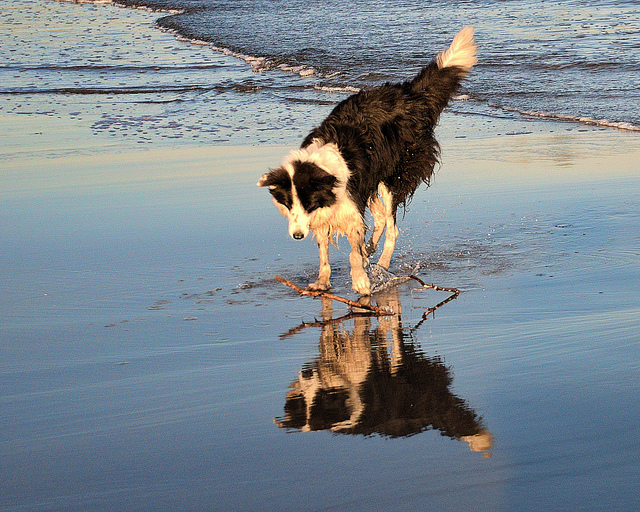

In [1]:
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.models import load_model

# extract features from each photo in the directory
def extract_features(filename):
	# load the model
	model = VGG16()
	# re-structure the model
	model.layers.pop()
	model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
	# load the photo
	image = load_img(filename, target_size=(224, 224))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the VGG model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
model = load_model('model-ep001-loss4.501-val_loss4.049.h5')
# load and prepare the photograph
photo = extract_features('example.jpg')

from IPython.display import Image
Image(filename='example.jpg') 

In [2]:
photo

array([[0.       , 0.7611542, 4.731776 , ..., 0.       , 0.6145036,
        0.       ]], dtype=float32)

In [3]:
tokenizer

In [6]:
# generate description
description = generate_desc(model, tokenizer, photo, max_length)
print(description)

startseq black dog is running in the water endseq


### Extensions
This section lists some ideas for extending the tutorial that you may wish to explore.

- Alternate Pre-Trained Photo Models. A small 16-layer VGG model was used for feature extraction. Consider exploring larger models that offer better performance on the ImageNet dataset, such as Inception.

- Smaller Vocabulary. A larger vocabulary of nearly eight thousand words was used in the development of the model. Many of the words supported may be misspellings or only used once in the entire dataset. Refine the vocabulary and reduce the size, perhaps by half.

- Pre-trained Word Vectors. The model learned the word vectors as part of fitting the model. Better performance may be achieved by using word vectors either pre-trained on the training dataset or trained on a much larger corpus of text, such as news articles or Wikipedia.

- Tune Model. The configuration of the model was not tuned on the problem. Explore alternate configurations and see if you can achieve better performance.